# Overview

This notebook processes and visualizes the demographic (census) data for each of the three service areas around the San Gabriel National Monument.

# Setup

In [1]:
# Import libraries
import arcpy, pandas as pd, numpy as np, arcgis, os
import matplotlib.pyplot as plt, seaborn as sns
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [2]:
# Magic commands
%matplotlib inline

In [3]:
# Set workspace settings
arcpy.env.workspace  = r"C:\Users\kathr\Documents\outdoor-alliance\san-gabriel\san-gabriel-analysis\sg_output.gdb"
arcpy.env.overwriteOutput = True

In [4]:
# Set gdb path
gdb_path = r"C:\Users\kathr\Documents\outdoor-alliance\san-gabriel\san-gabriel-analysis\sg_output.gdb"

# Set visualization folder
viz_path = r"C:\Users\kathr\Documents\outdoor-alliance\san-gabriel\viz"

# Service Area with Rings

"Rings" means that the inner service areas are not included in the outer service areas. For example, the 5-30 mile service area does not include the 0-5 mile service area.

## Demographic Profiles - Race/Ethnicity

### 0 - 5 mile service area

In [21]:
# Create pandas dataframe from feature class
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_rings")

In [22]:
# View the dataframe
sa_1_census_df.head()

,OBJECTID,GEOID,NAME,County_Name,State_Name,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,...,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,UA,UATYPE,UR,CD116,SLDU18,SLDL18,VTD,VTDI,ZCTA,SDELM,SDSEC,SDUNI,PUMA,AREALAND,AREAWATR,AWATER,ALAND,INTPTLON,INTPTLAT,BASENAME,FUNCSTAT,GCUNI,POP100,HU100,PARTFLAG,UGA,AMRZE001,AMRZE022,AMRZE023,AMRZE024,AMRZE025,AMZME001,AMZME002,AMZME003,SHAPE
0,1,6.037400e+09,Census Tract 4004.04,Los Angeles County,California,363.913926,311.343139,240.568493,4.816268,1.061212,47.754519,0.081632,17.061016,52.570787,50.285101,1.469370,3.265266,8.734587,0.408158,34.285296,0.081632,0.408158,0.0,0.244895,0.000000,0.000000,0.244895,0.489790,0.571422,0.081632,2.204055,0.000000,0.081632,0.000000,0.000000,0.244895,0.000000,0.816317,0.571422,0.489790,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,15832137,330968,27017.466179,1.292404e+06,-117.8289250,+34.1534341,4004.04,S,None,4458,1531,None,None,254.527506,87.100978,33.142453,8.244797,4.571373,342.934590,4.571373,13.469223,"{""rings"": [[[-13118591.6018, 4047671.689400002..."
1,2,6.037401e+09,Census Tract 4005.01,Los Angeles County,California,1703.078072,1469.745582,1114.349475,19.928754,9.134012,232.502126,2.491094,91.340121,233.332491,221.707384,9.964377,23.250213,39.857507,0.000000,145.313829,0.830365,0.000000,0.0,0.000000,0.000000,0.000000,1.660729,0.000000,0.000000,0.830365,9.964377,0.000000,0.830365,0.000000,0.000000,0.000000,0.000000,2.491094,0.000000,5.812553,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,11741511,10499,8717.999358,9.749737e+06,-117.8642089,+34.1610929,4005.01,S,None,2051,740,None,None,1337.717589,391.101790,180.189148,108.777780,23.250213,1679.827860,30.723495,49.821884,"{""rings"": [[[-13119670.466699999, 4050051.6894..."
2,3,6.037401e+09,Census Tract 4006.02,Los Angeles County,California,4816.919897,3703.938405,1383.976985,123.997938,153.997439,393.993448,4.999917,1642.972678,1112.981492,1059.982373,18.999684,51.999135,30.999484,2.999950,890.985183,0.000000,0.000000,0.0,17.999701,1.999967,0.000000,36.999385,0.999983,5.999900,0.000000,46.999218,1.999967,5.999900,0.000000,2.999950,0.999983,1.999967,25.999568,1.999967,3.999933,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1541334,1766,1765.970633,1.541308e+06,-117.9091006,+34.1381275,4006.02,S,None,4817,1544,None,None,2876.952158,465.992251,130.997822,63.998936,4.999917,4434.926249,234.996092,179.997007,"{""rings"": [[[-13124839.2653, 4046735.460699998..."
3,4,6.037401e+09,Census Tract 4006.03,Los Angeles County,California,4775.705156,3854.169014,1708.825947,246.840038,69.288432,930.197196,8.661054,890.356348,921.536142,868.703713,10.393265,37.242532,63.225694,0.000000,691.152106,11.259370,19.054319,0.0,6.928843,0.000000,0.000000,10.393265,0.866105,18.188213,0.000000,47.635797,6.928843,0.866105,0.000000,1.732211,4.330527,0.000000,14.723792,5.196632,10.393265,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9178408,8684,7521.259262,7.949469e+06,-117.9217301,+34.1546148,4006.03,S,None,5514,2040,None,None,2960.348245,569.897351,333.450578,155.898971,30.313689,4277.694553,130.781915,109.995385,"{""rings"": [[[-13129000.466699999, 4047546.6894..."
4,5,6.037401e+09,Census Tract 4006.05,Los Angeles County,California,7160.774906,6132.807220,2209.930533,235.992582,63.997988,2639.917016,14.999529,967.969573,1027.967687,952.970044,38.998774,50.998397,131.995851,0.999969,663.979128,3.999874,4.999843,0.0,11.999623,6.999780,0.999969,9.999686,13.999560,10.999654,1.999937,72.997705,3.999874,7.999749,0.999969,11.999623,0.000000,0.000000,30.999026,2.999906,13.9995

In [23]:
# Caculate percentages of each race for each census tract
sa_1_census_df["PCT_P0020002"] = np.round(100 * (sa_1_census_df["P0020002"] / sa_1_census_df["P0010001"]), 2) # pct hispanic or latino
sa_1_census_df["PCT_P0020005"] = np.round(100 * (sa_1_census_df["P0020005"] / sa_1_census_df["P0010001"]), 2) # pct white
sa_1_census_df["PCT_P0020006"] = np.round(100 * (sa_1_census_df["P0020006"] / sa_1_census_df["P0010001"]), 2) # pct Black
sa_1_census_df["PCT_P0020007"] = np.round(100 * (sa_1_census_df["P0020007"] / sa_1_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_1_census_df["PCT_P0020008"] = np.round(100 * (sa_1_census_df["P0020008"] / sa_1_census_df["P0010001"]), 2) # pct asian
sa_1_census_df["PCT_P0020009"] = np.round(100 * (sa_1_census_df["P0020009"] / sa_1_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_1_census_df["PCT_P0020010"] = np.round(100 * (sa_1_census_df["P0020010"] / sa_1_census_df["P0010001"]), 2) # pct other
sa_1_census_df["PCT_P0020011"] = np.round(100 * (sa_1_census_df["P0020011"] / sa_1_census_df["P0010001"]), 2) # pct two+ races

In [24]:
# Calculate total pct of each race for the entire service area
cols = ["P0020002", # hispanic/latino - not included in the remaining categories
        "P0020005", # white
        "P0020006", # Black
        "P0020007", # american indian/alaska native
        "P0020008", # asian
        "P0020009", # native hawaiian
        "P0020010", # other
        "P0020011"] # two+ races
col_names = ["Hispanic/Latino",
            "White",
            "Black",
            "American Indian/Alaska Native",
            "Asian",
            "Native Hawaiian/Pacific Islander",
            "Other Race",
            "Multiracial (2+ Races)"]

summary_df = pd.DataFrame()
summary_df["Race"] = col_names

total_pop = sum(sa_1_census_df["P0010001"])
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df[col])/total_pop), 2) for col in cols]

In [25]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

pct_cols = ["PCT_P0020002", # hispanic/latino - not included in the remaining categories
        "PCT_P0020005", # white
        "PCT_P0020006", # Black
        "PCT_P0020007", # american indian/alaska native
        "PCT_P0020008", # asian
        "PCT_P0020009", # native hawaiian
        "PCT_P0020010", # other
        "PCT_P0020011"] # two+ races

max_cols = sa_1_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [26]:
# Add column to original census df for most prevalent race/ethnicity
sa_1_census_df["Prevalent_Race"] = max_cols

### 5 - 30 mile service area

In [27]:
# Create pandas dataframe from feature class
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_rings")

In [28]:
# Caculate percentages of each race for each census tract
sa_2_census_df["PCT_P0020002"] = np.round(100 * (sa_2_census_df["P0020002"] / sa_2_census_df["P0010001"]), 2) # pct hispanic or latino
sa_2_census_df["PCT_P0020005"] = np.round(100 * (sa_2_census_df["P0020005"] / sa_2_census_df["P0010001"]), 2) # pct white
sa_2_census_df["PCT_P0020006"] = np.round(100 * (sa_2_census_df["P0020006"] / sa_2_census_df["P0010001"]), 2) # pct Black
sa_2_census_df["PCT_P0020007"] = np.round(100 * (sa_2_census_df["P0020007"] / sa_2_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_2_census_df["PCT_P0020008"] = np.round(100 * (sa_2_census_df["P0020008"] / sa_2_census_df["P0010001"]), 2) # pct asian
sa_2_census_df["PCT_P0020009"] = np.round(100 * (sa_2_census_df["P0020009"] / sa_2_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_2_census_df["PCT_P0020010"] = np.round(100 * (sa_2_census_df["P0020010"] / sa_2_census_df["P0010001"]), 2) # pct other
sa_2_census_df["PCT_P0020011"] = np.round(100 * (sa_2_census_df["P0020011"] / sa_2_census_df["P0010001"]), 2) # pct two+ races

In [29]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_2_census_df["P0010001"])

summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df[col])/total_pop), 2) for col in cols]

In [30]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

max_cols = sa_2_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [31]:
# Add column to original census df for most prevalent race/ethnicity
sa_2_census_df["Prevalent_Race"] = max_cols

### 30 - 90 mile service area

In [32]:
# Create pandas dataframe from feature class
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_rings") 

In [33]:
# Caculate percentages of each race for each census tract
sa_3_census_df["PCT_P0020002"] = np.round(100 * (sa_3_census_df["P0020002"] / sa_3_census_df["P0010001"]), 2) # pct hispanic or latino
sa_3_census_df["PCT_P0020005"] = np.round(100 * (sa_3_census_df["P0020005"] / sa_3_census_df["P0010001"]), 2) # pct white
sa_3_census_df["PCT_P0020006"] = np.round(100 * (sa_3_census_df["P0020006"] / sa_3_census_df["P0010001"]), 2) # pct Black
sa_3_census_df["PCT_P0020007"] = np.round(100 * (sa_3_census_df["P0020007"] / sa_3_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_3_census_df["PCT_P0020008"] = np.round(100 * (sa_3_census_df["P0020008"] / sa_3_census_df["P0010001"]), 2) # pct asian
sa_3_census_df["PCT_P0020009"] = np.round(100 * (sa_3_census_df["P0020009"] / sa_3_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_3_census_df["PCT_P0020010"] = np.round(100 * (sa_3_census_df["P0020010"] / sa_3_census_df["P0010001"]), 2) # pct other
sa_3_census_df["PCT_P0020011"] = np.round(100 * (sa_3_census_df["P0020011"] / sa_3_census_df["P0010001"]), 2) # pct two+ races

In [34]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_3_census_df["P0010001"])

summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df[col])/total_pop), 2) for col in cols]

In [35]:
# Most prevalent race/ethnic group
# https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html

max_cols = sa_3_census_df[pct_cols].idxmax(axis=1)

# Replace column names with readable values
max_cols = max_cols.replace("PCT_P0020002", "Hispanic/Latino")
max_cols = max_cols.replace("PCT_P0020005", "White")
max_cols = max_cols.replace("PCT_P0020006", "Black")
max_cols = max_cols.replace("PCT_P0020007", "American Indian/Alaska Native")
max_cols = max_cols.replace("PCT_P0020008", "Asian")
max_cols = max_cols.replace("PCT_P0020009", "Native Hawaiian/Pacific Islander")
max_cols = max_cols.replace("PCT_P0020010", "Other Race")
max_cols = max_cols.replace("PCT_P0020011", "Two or More Races")

In [36]:
# Add column to original census df for most prevalent race/ethnicity
sa_3_census_df["Prevalent_Race"] = max_cols

### Entire state of CA

In [37]:
# Create pandas dataframe from feature class
ca_census_df = pd.DataFrame.spatial.from_featureclass("ca_census")

In [38]:
# Caculate percentages of each race for each census tract
ca_census_df["PCT_P0020002"] = np.round(100 * (ca_census_df["P0020002"] / ca_census_df["P0010001"]), 2) # pct hispanic or latino
ca_census_df["PCT_P0020005"] = np.round(100 * (ca_census_df["P0020005"] / ca_census_df["P0010001"]), 2) # pct white
ca_census_df["PCT_P0020006"] = np.round(100 * (ca_census_df["P0020006"] / ca_census_df["P0010001"]), 2) # pct Black
ca_census_df["PCT_P0020007"] = np.round(100 * (ca_census_df["P0020007"] / ca_census_df["P0010001"]), 2) # pct american indian/alaska native
ca_census_df["PCT_P0020008"] = np.round(100 * (ca_census_df["P0020008"] / ca_census_df["P0010001"]), 2) # pct asian
ca_census_df["PCT_P0020009"] = np.round(100 * (ca_census_df["P0020009"] / ca_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
ca_census_df["PCT_P0020010"] = np.round(100 * (ca_census_df["P0020010"] / ca_census_df["P0010001"]), 2) # pct other
ca_census_df["PCT_P0020011"] = np.round(100 * (ca_census_df["P0020011"] / ca_census_df["P0010001"]), 2) # pct two+ races

In [39]:
# Calculate total pct of each race for the entire state
total_pop = sum(ca_census_df["P0010001"])

summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df[col])/total_pop), 2) for col in cols]

In [40]:
# View the summary dataframe
summary_df

,Race,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,Hispanic/Latino,57.23,53.54,40.21,39.40
1,White,23.27,20.27,36.54,34.69
2,Black,2.74,5.39,6.74,5.36
3,American Indian/Alaska Native,0.25,0.19,0.30,0.39
4,Asian,13.42,17.37,11.31,15.12
5,Native Hawaiian/Pacific Islander,0.09,0.19,0.28,0.35
6,Other Race,0.49,0.50,0.59,0.57
7,Multiracial (2+ Races),2.51,2.55,4.04,4.12


### Plots

In [41]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df, id_vars = ["Race"])
summary_long.head()

,Race,variable,value
0,Hispanic/Latino,PCT_SA_1,57.23
1,White,PCT_SA_1,23.27
2,Black,PCT_SA_1,2.74
3,American Indian/Alaska Native,PCT_SA_1,0.25
4,Asian,PCT_SA_1,13.42


In [42]:
# Sort dataframe to get the correct plotting order
summary_sorted = summary_df.sort_values(by = "PCT_SA_1", ascending = False)

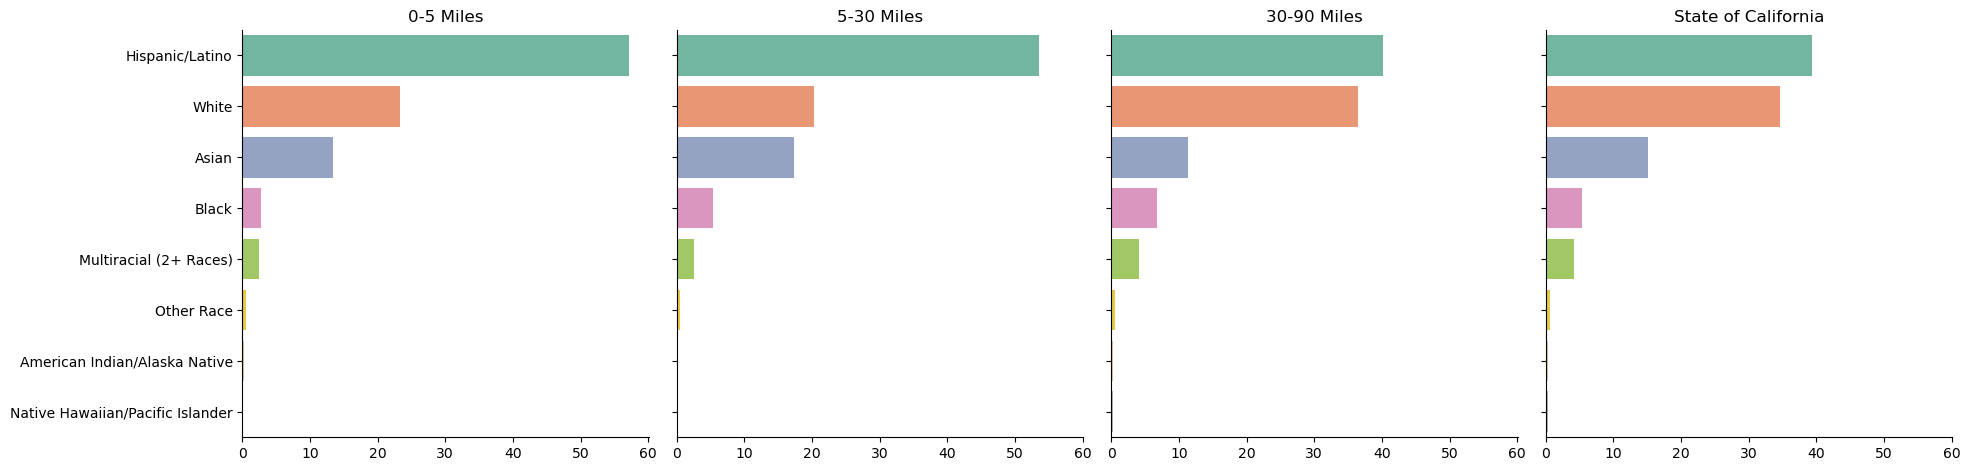

In [43]:
# Plot pct of each race for each service area - summary_df

# Create plot
p = sns.catplot(data = summary_long,
                x = "value",
                y = "Race",
                col = "variable",
                kind = "bar",
                palette = "Set2",
                order = summary_sorted["Race"].values) # most prevalent at the top

# Change individual plot titles
axes = p.axes.flatten()
axes[0].set_title("0-5 Miles")
axes[1].set_title("5-30 Miles")
axes[2].set_title("30-90 Miles")
axes[3].set_title("State of California")

# Change axis labels
p.set_axis_labels(x_var = "", # or Percent
                 y_var = "")

# Export plot
plt.savefig(os.path.join(viz_path, "race_pct.png"))

### Write updated dfs back to feature classes

In [164]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\san-gabriel\\san-gabriel-analysis\\sg_output.gdb\\updated_sa_3_rings_census'

## Demographic Profiles - Education

### Summary Table

In [62]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_1_rings_census")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_2_rings_census")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_3_rings_census")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [63]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [64]:
edu_cols = ["AMRZE022", # Bachelor's degree 
            "AMRZE023", # Master's degree 
            "AMRZE024", # Professional school degree 
            "AMRZE025"] # Doctorate degree 

In [65]:
sa_1_census_df["Bach_Higher_Count"] = sa_1_census_df[edu_cols].sum(axis = 1)
sa_2_census_df["Bach_Higher_Count"] = sa_2_census_df[edu_cols].sum(axis = 1)
sa_3_census_df["Bach_Higher_Count"] = sa_3_census_df[edu_cols].sum(axis = 1)
ca_census_df["Bach_Higher_Count"] = ca_census_df[edu_cols].sum(axis = 1)

In [66]:
sa_1_census_df["Bach_Higher_Pct"] = 100 * (sa_1_census_df["Bach_Higher_Count"] / sa_1_census_df["AMRZE001"])
sa_2_census_df["Bach_Higher_Pct"] = 100 * (sa_2_census_df["Bach_Higher_Count"] / sa_2_census_df["AMRZE001"])
sa_3_census_df["Bach_Higher_Pct"] = 100 * (sa_3_census_df["Bach_Higher_Count"] / sa_3_census_df["AMRZE001"])

In [67]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Bach_Higher_Count"])/sum(sa_1_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Bach_Higher_Count"])/sum(sa_2_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Bach_Higher_Count"])/sum(sa_3_census_df["AMRZE001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Bach_Higher_Count"])/sum(ca_census_df["AMRZE001"])), 2)]

In [68]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,28.96,28.77,35.14,34.72


### Plots

In [69]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df)
summary_long.head()

,variable,value
0,PCT_SA_1,28.96
1,PCT_SA_2,28.77
2,PCT_SA_3,35.14
3,PCT_CA,34.72


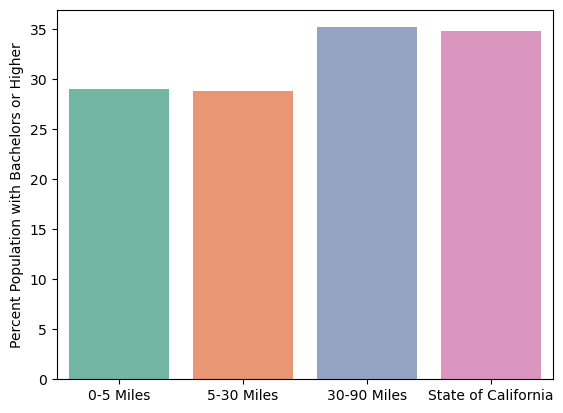

In [70]:
# Create barplot
p = sns.barplot(data = summary_long,
           x = "variable",
           y = "value",
           palette = "Set2")

# Change axis labels
p.set_xlabel("")
p.set_ylabel("Percent Population with Bachelors or Higher")

# Change tick labels
p.set_xticklabels(["0-5 Miles", "5-30 Miles", "30-90 Miles", "State of California"])

# Export plot
plt.savefig(os.path.join(viz_path, "edu_pct.png"))

### Write updated dfs back to feature classes

In [171]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\san-gabriel\\san-gabriel-analysis\\sg_output.gdb\\updated_sa_3_rings_census'

## Demographic Profiles - Income

### Summary Table

In [71]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_1_rings_census")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_2_rings_census")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("updated_sa_3_rings_census")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [72]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [73]:
inc_cols = ["AMZME002", # Under .50
            "AMZME003"] # .50 - .99 

In [74]:
sa_1_census_df["Below_Pov_Line_Count"] = sa_1_census_df[inc_cols].sum(axis = 1)
sa_2_census_df["Below_Pov_Line_Count"] = sa_2_census_df[inc_cols].sum(axis = 1)
sa_3_census_df["Below_Pov_Line_Count"] = sa_3_census_df[inc_cols].sum(axis = 1)
ca_census_df["Below_Pov_Line_Count"] = ca_census_df[inc_cols].sum(axis = 1)

In [75]:
sa_1_census_df["Below_Pov_Line_Pct"] = 100 * (sa_1_census_df["Below_Pov_Line_Count"] / sa_1_census_df["AMZME001"])
sa_2_census_df["Below_Pov_Line_Pct"] = 100 * (sa_2_census_df["Below_Pov_Line_Count"] / sa_2_census_df["AMZME001"])
sa_3_census_df["Below_Pov_Line_Pct"] = 100 * (sa_3_census_df["Below_Pov_Line_Count"] / sa_3_census_df["AMZME001"])

In [76]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Below_Pov_Line_Count"])/sum(sa_1_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Below_Pov_Line_Count"])/sum(sa_2_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Below_Pov_Line_Count"])/sum(sa_3_census_df["AMZME001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Below_Pov_Line_Count"])/sum(ca_census_df["AMZME001"])), 2)]

In [77]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,10.43,14.3,12.06,12.58


### Plots

In [78]:
# Reshape summary_df to long format
summary_long = pd.melt(summary_df)
summary_long.head()

,variable,value
0,PCT_SA_1,10.43
1,PCT_SA_2,14.30
2,PCT_SA_3,12.06
3,PCT_CA,12.58


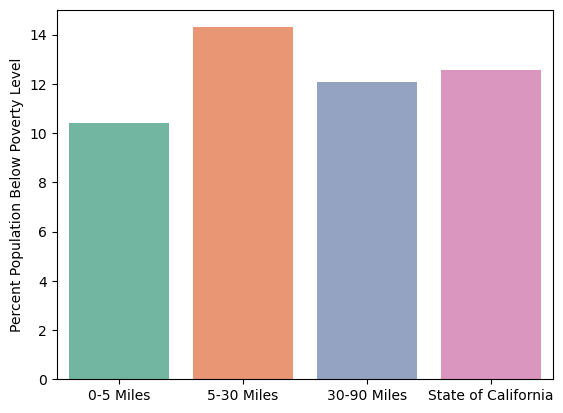

In [79]:
# Create barplot
p = sns.barplot(data = summary_long,
           x = "variable",
           y = "value",
           palette = "Set2")

# Change axis labels
p.set_xlabel("")
p.set_ylabel("Percent Population Below Poverty Level")

# Change tick labels
p.set_xticklabels(["0-5 Miles", "5-30 Miles", "30-90 Miles", "State of California"])

# Export plot
plt.savefig(os.path.join(viz_path, "inc_pct.png"))

### Write updated dfs back to feature class

In [222]:
# Write dataframes back to feature class so the updated columns can be mapped
sa_1_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_1_rings_census"), 
                                        sanitize_columns=False)
sa_2_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_2_rings_census"), 
                                        sanitize_columns=False)
sa_3_census_df.copy().spatial.to_featureclass(location=os.path.join(gdb_path, "updated_sa_3_rings_census"), 
                                        sanitize_columns=False)

'C:\\Users\\kathr\\Documents\\outdoor-alliance\\san-gabriel\\san-gabriel-analysis\\sg_output.gdb\\updated_sa_3_rings_census'

# Maps

## Race/Ethnicity

In [172]:
# Set up environment
aprx = arcpy.mp.ArcGISProject("CURRENT")
aprx.defaultGeodatabase = gdb_path

### Most Prevalent Race for Each Census Tract

In [223]:
# Create map
# https://pro.arcgis.com/en/pro-app/latest/arcpy/mapping/arcgisproject-class.htm
# prev_race = aprx.createMap(name = "Most Prevalent Race", 
#                            map_type = "MAP")
prev_race = aprx.listMaps("Most Prevalent Race")[0]

In [224]:
# Add updated census data for all 3 service areas
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [225]:
# Get layers on map
sa_1 = prev_race.listLayers("updated_sa_1_rings_census")[0]
sa_2 = prev_race.listLayers("updated_sa_2_rings_census")[0]
sa_3 = prev_race.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [226]:
# Map all service areas with same alpha
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("UniqueValueRenderer") 
    sym.renderer.fields = ["Prevalent_Race"]

    for grp in sym.renderer.groups:
        for itm in grp.items:
            myVal = itm.values[0][0]
            #print("myVal: {0}".format(myVal))
            # RGB values taken from colors in the Set 2 (8 classes) color ramp
            # https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=8
            if myVal == "Hispanic/Latino":
                itm.symbol.color = {"RGB": [252, 141, 98, 100]} 
            elif myVal == "White":
                itm.symbol.color = {"RGB": [141, 160, 203, 100]} 
            elif myVal == "Asian":
                itm.symbol.color = {"RGB": [166, 216, 84, 100]} 
            elif myVal == "Black":
                itm.symbol.color = {"RGB": [255, 217, 47, 100]} 
            elif myVal == "Two or More Races":
                itm.symbol.color = {"RGB": [213, 138, 195, 100]} 
            elif myVal == "American Indian/Alaska Native":
                itm.symbol.color = {"RGB": [102, 194, 165, 100]} 
            elif myVal == "Native Hawaiian/Pacific Islander":
                itm.symbol.color = {"RGB": [229, 196, 148, 100]}
            elif myVal == "Other Race":
                itm.symbol.color = {"RGB": [179, 179, 179, 100]}
            elif myVal == "<Null>":
                itm.symbol.color = {"RGB": [0, 0, 0, 0]}
            
            lyr.symbology = sym

In [177]:
# Mapping with different alphas to emphasize different service areas

In [178]:
# Define list of maps to create
map_names = ["SA1 Prev Race", "SA2 Prev Race", "SA3 Prev Race"]

# Create each map
# for name in map_names:
#     aprx.createMap(name = name,
#                   map_type = "MAP")

In [235]:
# Define which map to update
#prev_race = aprx.listMaps("SA1 Prev Race")[0]
#prev_race = aprx.listMaps("SA2 Prev Race")[0]
prev_race = aprx.listMaps("SA3 Prev Race")[0]

In [236]:
# Add updated census data for all 3 service areas
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
prev_race.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [237]:
# Get layers on map
sa_1 = prev_race.listLayers("updated_sa_1_rings_census")[0]
sa_2 = prev_race.listLayers("updated_sa_2_rings_census")[0]
sa_3 = prev_race.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [238]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("UniqueValueRenderer")
    sym.renderer.fields = ["Prevalent_Race"]

    for grp in sym.renderer.groups:
        for itm in grp.items:
            myVal = itm.values[0][0]
            #print("myVal: {0}".format(myVal))
            # RGB values taken from colors in the Set 2 (8 classes) color ramp
            # https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=8
            if myVal == "Hispanic/Latino":
                itm.symbol.color = {"RGB": [252, 141, 98, alpha]} 
            elif myVal == "White":
                itm.symbol.color = {"RGB": [141, 160, 203, alpha]} 
            elif myVal == "Asian":
                itm.symbol.color = {"RGB": [166, 216, 84, alpha]} 
            elif myVal == "Black":
                itm.symbol.color = {"RGB": [255, 217, 47, alpha]} 
            elif myVal == "Two or More Races":
                itm.symbol.color = {"RGB": [213, 138, 195, alpha]} 
            elif myVal == "American Indian/Alaska Native":
                itm.symbol.color = {"RGB": [102, 194, 165, alpha]} 
            elif myVal == "Native Hawaiian/Pacific Islander":
                itm.symbol.color = {"RGB": [229, 196, 148, alpha]}
            elif myVal == "Other Race":
                itm.symbol.color = {"RGB": [179, 179, 179, alpha]}
            elif myVal == "<Null>":
                itm.symbol.color = {"RGB": [0, 0, 0, 0]}
            
            lyr.symbology = sym

### Race densities

In [18]:
# Define list of maps to create
map_names = ["Pct Hispanic or Latino",
            "Pct White",
            "Pct Black",
            "Pct American Indian or Alaska Native",
            "Pct Asian", 
            "Pct Native Hawaiian or Pacific Islander",
            "Pct Other",
            "Pct Two+"]

# Create each map
# for name in map_names:
#     aprx.createMap(name = name,
#                   map_type = "MAP")

In [16]:
# Define columns to use for mapping
pct_cols = ["PCT_P0020002", # hispanic/latino
        "PCT_P0020005", # white
        "PCT_P0020006", # Black
        "PCT_P0020007", # american indian/alaska native
        "PCT_P0020008", # asian
        "PCT_P0020009", # native hawaiian
        "PCT_P0020010", # other
        "PCT_P0020011"] # two+ races

In [15]:
# Map with Graduated Colors / manually specified breaks
# Iterate over all maps and symbolize based on each racial/ethnic group one by one
for i in range(len(map_names)):
    # Get the current map
    cur_map = aprx.listMaps(map_names[i])[0]
    
    # Add census data to the map
    cur_map.addDataFromPath(os.path.join(gdb_path, "nd_rings_census"))
    
    # Get the map layer
    lyr = cur_map.listLayers("nd_rings_census")[0]
    
    # Update symbology
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = pct_cols[i] 
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]

    break_val = 20
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 20) + " - " + str(break_val)
        break_val += 20

    lyr.symbology = sym

In [19]:
# Map with Unclassed Colors
# Iterate over all maps and symbolize based on each racial/ethnic group one by one
for i in range(len(map_names)):
    # Get the current map
    cur_map = aprx.listMaps(map_names[i])[0]
    
    # Add census data to the map
    cur_map.addDataFromPath(os.path.join(gdb_path, "nd_rings_census"))
    
    # Get the map layer
    lyr = cur_map.listLayers("nd_rings_census")[0]
    
    # Update symbology
    sym = lyr.symbology
    sym.updateRenderer("UnclassedColorsRenderer")
    sym.renderer.field = pct_cols[i] 
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]

    lyr.symbology = sym

In [240]:
# https://pro.arcgis.com/en/pro-app/latest/arcpy/charts/histogram.htm
chart = arcpy.charts.Histogram("PCT_P0020002", binCount=10, showMedian=True, dataSource=lyr, title="Histogram P0020002")

chart.addToLayer(lyr)

In [241]:
#TODO bar charts?
bar = arcpy.charts.Bar(x="NAME", y = "PCT_P0020002", title="Bar P0020002", dataSource=lyr)
bar.yAxis.sort = "DESC"
bar.addToLayer(lyr)

## Education

In [239]:
# Define map
# edu = aprx.createMap(name = "Education",
#                     map_type = "MAP")
edu = aprx.listMaps("Education")[0] 

# Add education census data for all 3 service areas
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [240]:
# Get layers on map
sa_1 = edu.listLayers("updated_sa_1_rings_census")[0]
sa_2 = edu.listLayers("updated_sa_2_rings_census")[0]
sa_3 = edu.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [241]:
# Mapping with all the same alpha
for lyr in all_sa:
    sym = lyr.symbology
    #sym.updateRenderer("UnclassedColorsRenderer")
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = "Bach_Higher_Pct"
    #sym.renderer.field = "Bach_Higher_Pct"
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    
    break_val = 20
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 20) + " - " + str(break_val)
        break_val += 20
            
    lyr.symbology = sym

In [194]:
# Mapping with different alphas to emphasize different service areas

In [195]:
# Define list of maps to create
map_names = ["SA1 Education", "SA2 Education", "SA3 Education"]

# Create each map
# for name in map_names:
#     aprx.createMap(name = name,
#                   map_type = "MAP")

In [252]:
# Define which map to update
#edu = aprx.listMaps("SA1 Education")[0]
#edu = aprx.listMaps("SA2 Education")[0]
edu = aprx.listMaps("SA3 Education")[0]

In [253]:
# Add census data to the map
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
edu.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [254]:
# Get layers from map
sa_1 = edu.listLayers("updated_sa_1_rings_census")[0]
sa_2 = edu.listLayers("updated_sa_2_rings_census")[0]
sa_3 = edu.listLayers("updated_sa_3_rings_census")[0]
all_sa = [sa_1, sa_2, sa_3]

In [255]:
# Manually specify colors from breaking the Viridis color ramp into 5 blocks
colors = [[68, 1, 84], # purple
          [59, 82, 140], # dark blue
          [33, 145, 141], # teal
          [93, 201, 99], # green
          [254, 232, 37] # yellow
         ]

In [256]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer") 
    sym.renderer.classificationField = "Bach_Higher_Pct"
    sym.renderer.breakCount = 5
    
    break_val = 20
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 20) + " - " + str(break_val)
        break_val += 20
        brk.symbol.color = {"RGB" : [colors[i][0], colors[i][1], colors[i][2], alpha]}
        i += 1
            
    lyr.symbology = sym

## Income

In [261]:
# Define map
# income = aprx.createMap(name = "Income",
#                     map_type = "MAP")
income = aprx.listMaps("Income")[0]

# Add census data to the map
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [262]:
# Get layers on map
sa_1 = income.listLayers("updated_sa_1_rings_census")[0]
sa_2 = income.listLayers("updated_sa_2_rings_census")[0]
sa_3 = income.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [263]:
# Map entire service area with unclassed colors to see the range of the data
# sa 1 = 1-25
# sa 2 = 0-80
# sa 3 = 0-100
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("UnclassedColorsRenderer")
    sym.renderer.field = "Below_Pov_Line_Pct"
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    lyr.symbology = sym

In [264]:
# Mapping with all the same alpha
for lyr in all_sa:
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer")
    sym.renderer.classificationField = "Below_Pov_Line_Pct"
    sym.renderer.breakCount = 5
    sym.renderer.colorRamp = aprx.listColorRamps("Viridis")[0]
    
    break_val = 20
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 20) + " - " + str(break_val)
        break_val += 20
            
    lyr.symbology = sym

In [48]:
# Mapping with different alphas to emphasize different service areas

In [49]:
# Define list of maps to create
map_names = ["SA1 Income", "SA2 Income", "SA3 Income"]

# Create each map
# for name in map_names:
#     aprx.createMap(name = name,
#                   map_type = "MAP")

In [280]:
# Define which map to update
#income = aprx.listMaps("SA1 Income")[0]
#income = aprx.listMaps("SA2 Income")[0]
income = aprx.listMaps("SA3 Income")[0]

In [281]:
# Add census data to the map
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_1_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_2_rings_census"))
income.addDataFromPath(os.path.join(gdb_path, "updated_sa_3_rings_census"))

In [282]:
# Get layers from map
sa_1 = income.listLayers("updated_sa_1_rings_census")[0]
sa_2 = income.listLayers("updated_sa_2_rings_census")[0]
sa_3 = income.listLayers("updated_sa_3_rings_census")[0]

all_sa = [sa_1, sa_2, sa_3]

In [283]:
# Manually specify colors from breaking the Viridis color ramp into 5 blocks
colors = [[68, 1, 84], # purple
          [59, 82, 140], # dark blue
          [33, 145, 141], # teal
          [93, 201, 99], # green
          [254, 232, 37] # yellow
         ]

In [284]:
# Iterate through the three service areas and add each to the map with updated symbology
for lyr in all_sa:
    alpha = 30
    # Update alpha for the service area that is being highlighted
    #if lyr.name == "updated_sa_1_rings_census":
    #if lyr.name == "updated_sa_2_rings_census":
    if lyr.name == "updated_sa_3_rings_census":
        alpha = 100
    sym = lyr.symbology
    sym.updateRenderer("GraduatedColorsRenderer") 
    sym.renderer.classificationField = "Below_Pov_Line_Pct"
    sym.renderer.breakCount = 5
    
    break_val = 20
    i = 0
    for brk in sym.renderer.classBreaks:
        brk.upperBound = break_val
        brk.label = str(break_val - 15) + " - " + str(break_val)
        break_val += 20
        brk.symbol.color = {"RGB" : [colors[i][0], colors[i][1], colors[i][2], alpha]}
        i += 1
            
    lyr.symbology = sym

# Service Area with Disks

"Disks" means that the inner service areas are included in the outer service areas. For example, the 30 mile service area includes the 0-5 mile service area and the 5-30 mile service area.

## Demographic Profiles - Race/Ethnicity

### 5 mile service area

In [285]:
# Create pandas dataframe from feature class
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")

In [286]:
# Caculate percentages of each race for each census tract
sa_1_census_df["PCT_P0020002"] = np.round(100 * (sa_1_census_df["P0020002"] / sa_1_census_df["P0010001"]), 2) # pct hispanic or latino
sa_1_census_df["PCT_P0020005"] = np.round(100 * (sa_1_census_df["P0020005"] / sa_1_census_df["P0010001"]), 2) # pct white
sa_1_census_df["PCT_P0020006"] = np.round(100 * (sa_1_census_df["P0020006"] / sa_1_census_df["P0010001"]), 2) # pct Black
sa_1_census_df["PCT_P0020007"] = np.round(100 * (sa_1_census_df["P0020007"] / sa_1_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_1_census_df["PCT_P0020008"] = np.round(100 * (sa_1_census_df["P0020008"] / sa_1_census_df["P0010001"]), 2) # pct asian
sa_1_census_df["PCT_P0020009"] = np.round(100 * (sa_1_census_df["P0020009"] / sa_1_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_1_census_df["PCT_P0020010"] = np.round(100 * (sa_1_census_df["P0020010"] / sa_1_census_df["P0010001"]), 2) # pct other
sa_1_census_df["PCT_P0020011"] = np.round(100 * (sa_1_census_df["P0020011"] / sa_1_census_df["P0010001"]), 2) # pct two+ races

In [287]:
# Calculate total pct of each race for the entire service area
cols = ["P0020002", # hispanic/latino - not included in the remaining categories
        "P0020005", # white
        "P0020006", # Black
        "P0020007", # american indian/alaska native
        "P0020008", # asian
        "P0020009", # native hawaiian
        "P0020010", # other
        "P0020011"] # two+ races
col_names = ["Hispanic/Latino",
            "White",
            "Black",
            "American Indian/Alaska Native",
            "Asian",
            "Native Hawaiian/Pacific Islander",
            "Other Race",
            "Multiracial (2+ Races)"]

summary_df = pd.DataFrame()
summary_df["Race"] = col_names

total_pop = sum(sa_1_census_df["P0010001"])
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df[col])/total_pop), 2) for col in cols]

### 30 mile service area

In [288]:
# Create pandas dataframe from feature class
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("sa_2_disks_census")

In [289]:
# Caculate percentages of each race for each census tract
sa_2_census_df["PCT_P0020002"] = np.round(100 * (sa_2_census_df["P0020002"] / sa_2_census_df["P0010001"]), 2) # pct hispanic or latino
sa_2_census_df["PCT_P0020005"] = np.round(100 * (sa_2_census_df["P0020005"] / sa_2_census_df["P0010001"]), 2) # pct white
sa_2_census_df["PCT_P0020006"] = np.round(100 * (sa_2_census_df["P0020006"] / sa_2_census_df["P0010001"]), 2) # pct Black
sa_2_census_df["PCT_P0020007"] = np.round(100 * (sa_2_census_df["P0020007"] / sa_2_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_2_census_df["PCT_P0020008"] = np.round(100 * (sa_2_census_df["P0020008"] / sa_2_census_df["P0010001"]), 2) # pct asian
sa_2_census_df["PCT_P0020009"] = np.round(100 * (sa_2_census_df["P0020009"] / sa_2_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_2_census_df["PCT_P0020010"] = np.round(100 * (sa_2_census_df["P0020010"] / sa_2_census_df["P0010001"]), 2) # pct other
sa_2_census_df["PCT_P0020011"] = np.round(100 * (sa_2_census_df["P0020011"] / sa_2_census_df["P0010001"]), 2) # pct two+ races

In [290]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_2_census_df["P0010001"])

summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df[col])/total_pop), 2) for col in cols]

### 90 mile service area

In [291]:
# Create pandas dataframe from feature class
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("sa_3_disks_census") 

In [292]:
# Caculate percentages of each race for each census tract
sa_3_census_df["PCT_P0020002"] = np.round(100 * (sa_3_census_df["P0020002"] / sa_3_census_df["P0010001"]), 2) # pct hispanic or latino
sa_3_census_df["PCT_P0020005"] = np.round(100 * (sa_3_census_df["P0020005"] / sa_3_census_df["P0010001"]), 2) # pct white
sa_3_census_df["PCT_P0020006"] = np.round(100 * (sa_3_census_df["P0020006"] / sa_3_census_df["P0010001"]), 2) # pct Black
sa_3_census_df["PCT_P0020007"] = np.round(100 * (sa_3_census_df["P0020007"] / sa_3_census_df["P0010001"]), 2) # pct american indian/alaska native
sa_3_census_df["PCT_P0020008"] = np.round(100 * (sa_3_census_df["P0020008"] / sa_3_census_df["P0010001"]), 2) # pct asian
sa_3_census_df["PCT_P0020009"] = np.round(100 * (sa_3_census_df["P0020009"] / sa_3_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
sa_3_census_df["PCT_P0020010"] = np.round(100 * (sa_3_census_df["P0020010"] / sa_3_census_df["P0010001"]), 2) # pct other
sa_3_census_df["PCT_P0020011"] = np.round(100 * (sa_3_census_df["P0020011"] / sa_3_census_df["P0010001"]), 2) # pct two+ races

In [293]:
# Calculate total pct of each race for the entire service area
total_pop = sum(sa_3_census_df["P0010001"])

summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df[col])/total_pop), 2) for col in cols]

### Entire state of CA

In [294]:
# Create pandas dataframe from feature class
ca_census_df = pd.DataFrame.spatial.from_featureclass("ca_census")

In [295]:
# Caculate percentages of each race for each census tract
ca_census_df["PCT_P0020002"] = np.round(100 * (ca_census_df["P0020002"] / ca_census_df["P0010001"]), 2) # pct hispanic or latino
ca_census_df["PCT_P0020005"] = np.round(100 * (ca_census_df["P0020005"] / ca_census_df["P0010001"]), 2) # pct white
ca_census_df["PCT_P0020006"] = np.round(100 * (ca_census_df["P0020006"] / ca_census_df["P0010001"]), 2) # pct Black
ca_census_df["PCT_P0020007"] = np.round(100 * (ca_census_df["P0020007"] / ca_census_df["P0010001"]), 2) # pct american indian/alaska native
ca_census_df["PCT_P0020008"] = np.round(100 * (ca_census_df["P0020008"] / ca_census_df["P0010001"]), 2) # pct asian
ca_census_df["PCT_P0020009"] = np.round(100 * (ca_census_df["P0020009"] / ca_census_df["P0010001"]), 2) # pct native hawaiian/pacific islander
ca_census_df["PCT_P0020010"] = np.round(100 * (ca_census_df["P0020010"] / ca_census_df["P0010001"]), 2) # pct other
ca_census_df["PCT_P0020011"] = np.round(100 * (ca_census_df["P0020011"] / ca_census_df["P0010001"]), 2) # pct two+ races

In [296]:
# Calculate total pct of each race for the entire state
total_pop = sum(ca_census_df["P0010001"])

summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df[col])/total_pop), 2) for col in cols]

In [297]:
# View summary dataframe
summary_df

,Race,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,Hispanic/Latino,57.23,53.34,45.82,39.40
1,White,23.27,20.57,29.74,34.69
2,Black,2.74,5.71,6.16,5.36
3,American Indian/Alaska Native,0.25,0.20,0.26,0.39
4,Asian,13.42,16.89,13.82,15.12
5,Native Hawaiian/Pacific Islander,0.09,0.20,0.24,0.35
6,Other Race,0.49,0.51,0.55,0.57
7,Multiracial (2+ Races),2.51,2.58,3.41,4.12


## Demographic Profiles - Education

In [298]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_disks")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_disks")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [299]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [300]:
edu_cols = ["AMRZE022", # Bachelor's degree 
            "AMRZE023", # Master's degree 
            "AMRZE024", # Professional school degree 
            "AMRZE025"] # Doctorate degree 

In [301]:
sa_1_census_df["Bach_Higher_Count"] = sa_1_census_df[edu_cols].sum(axis = 1)
sa_2_census_df["Bach_Higher_Count"] = sa_2_census_df[edu_cols].sum(axis = 1)
sa_3_census_df["Bach_Higher_Count"] = sa_3_census_df[edu_cols].sum(axis = 1)
ca_census_df["Bach_Higher_Count"] = ca_census_df[edu_cols].sum(axis = 1)

In [302]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Bach_Higher_Count"])/sum(sa_1_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Bach_Higher_Count"])/sum(sa_2_census_df["AMRZE001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Bach_Higher_Count"])/sum(sa_3_census_df["AMRZE001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Bach_Higher_Count"])/sum(ca_census_df["AMRZE001"])), 2)]

In [303]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,28.96,28.77,32.46,34.72


## Demographic Profiles - Income

In [304]:
# Create dataframes from feature classes
sa_1_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_1_disks")
sa_2_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_2_disks")
sa_3_census_df = pd.DataFrame.spatial.from_featureclass("combined_census_sa_3_disks")
ca_census_df = pd.DataFrame.spatial.from_featureclass("combined_ca_census")

In [305]:
# Create empty dataframe to hold summary information
summary_df = pd.DataFrame()

In [306]:
inc_cols = ["AMZME002", # Under .50
            "AMZME003"] # .50 - .99 

In [307]:
sa_1_census_df["Below_Pov_Line_Count"] = sa_1_census_df[inc_cols].sum(axis = 1)
sa_2_census_df["Below_Pov_Line_Count"] = sa_2_census_df[inc_cols].sum(axis = 1)
sa_3_census_df["Below_Pov_Line_Count"] = sa_3_census_df[inc_cols].sum(axis = 1)
ca_census_df["Below_Pov_Line_Count"] = ca_census_df[inc_cols].sum(axis = 1)

In [308]:
sa_1_census_df["Below_Pov_Line_Pct"] = 100 * (sa_1_census_df["Below_Pov_Line_Count"] / sa_1_census_df["AMZME001"])
sa_2_census_df["Below_Pov_Line_Pct"] = 100 * (sa_2_census_df["Below_Pov_Line_Count"] / sa_2_census_df["AMZME001"])
sa_3_census_df["Below_Pov_Line_Pct"] = 100 * (sa_3_census_df["Below_Pov_Line_Count"] / sa_3_census_df["AMZME001"])

In [309]:
summary_df["PCT_SA_1"] = [np.round(100 * (sum(sa_1_census_df["Below_Pov_Line_Count"])/sum(sa_1_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_2"] = [np.round(100 * (sum(sa_2_census_df["Below_Pov_Line_Count"])/sum(sa_2_census_df["AMZME001"])), 2)]
summary_df["PCT_SA_3"] = [np.round(100 * (sum(sa_3_census_df["Below_Pov_Line_Count"])/sum(sa_3_census_df["AMZME001"])), 2)]
summary_df["PCT_CA"] = [np.round(100 * (sum(ca_census_df["Below_Pov_Line_Count"])/sum(ca_census_df["AMZME001"])), 2)]

In [310]:
summary_df

,PCT_SA_1,PCT_SA_2,PCT_SA_3,PCT_CA
0,10.43,14.25,12.99,12.58
